1. Carregar o dataset Data Science Job Salaries no software utilizado e gerar estatísticas descritivas.
2. Aplicar uma técnica de amostragem (sugestão: aplicar bootstrap)
3. Aplicar uma técnica de discretização (sugestão: transformar variável numérica em quantiles)
4. Aplicar uma técnica de Feature Engineering (sugestão: aplicar uma funçao que transforme os campos de ano e mês na quantidade de meses transcorrido desde uma data inicial. Por exemplo, ano 2020/mês 6 representariam 30 meses de antiguidade)

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bootstrap
from datetime import datetime


##Estatisticas descritivas

In [2]:
db = pd.read_csv("/content/ds_salaries.csv")
db.head()

,Unnamed: 0,work_year,work_month,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,6,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,11,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,12,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,6,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,10,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
db.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   work_month          607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [90]:
db['work_year'] = db['work_year'].astype('object')
db['work_month'] = db['work_month'].astype('object')
db['remote_ratio'] = db['remote_ratio'].astype('object')

In [91]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    object
 1   work_month          607 non-null    object
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    object
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(2), object(10)
memory usage: 57.0+ KB


In [92]:
db.columns

Index(['work_year', 'work_month', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [93]:
for i in db.columns:
  print(i, " : ",db[i].value_counts(ascending = False))

work_year  :  2022    318
2021    217
2020     72
Name: work_year, dtype: int64
work_month  :  6     68
4     60
5     55
10    53
2     51
8     50
9     50
11    49
3     45
12    44
1     42
7     40
Name: work_month, dtype: int64
experience_level  :  SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
employment_type  :  FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
job_title  :  Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant       

In [94]:
db.describe(include = np.number) #Apenas para valores numericos. O atributo de
                                 #salario possui uma media distante da mediana, sugirindo uma distribuicao muito variavel

,salary,salary_in_usd
count,6.070000e+02,607.000000
mean,3.240001e+05,112297.869852
std,1.544357e+06,70957.259411
min,4.000000e+03,2859.000000
25%,7.000000e+04,62726.000000
50%,1.150000e+05,101570.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


In [99]:
for i in db.columns:
  print(i, " : ",db[i].mode())
  print(" ") #Moda dos valores nao numericos

work_year  :  0    2022
Name: work_year, dtype: object
 
work_month  :  0    6
Name: work_month, dtype: object
 
experience_level  :  0    SE
Name: experience_level, dtype: object
 
employment_type  :  0    FT
Name: employment_type, dtype: object
 
job_title  :  0    Data Scientist
Name: job_title, dtype: object
 
salary  :  0     80000
1    100000
Name: salary, dtype: int64
 
salary_currency  :  0    USD
Name: salary_currency, dtype: object
 
salary_in_usd  :  0    100000
Name: salary_in_usd, dtype: int64
 
employee_residence  :  0    US
Name: employee_residence, dtype: object
 
remote_ratio  :  0    100
Name: remote_ratio, dtype: object
 
company_location  :  0    US
Name: company_location, dtype: object
 
company_size  :  0    M
Name: company_size, dtype: object
 


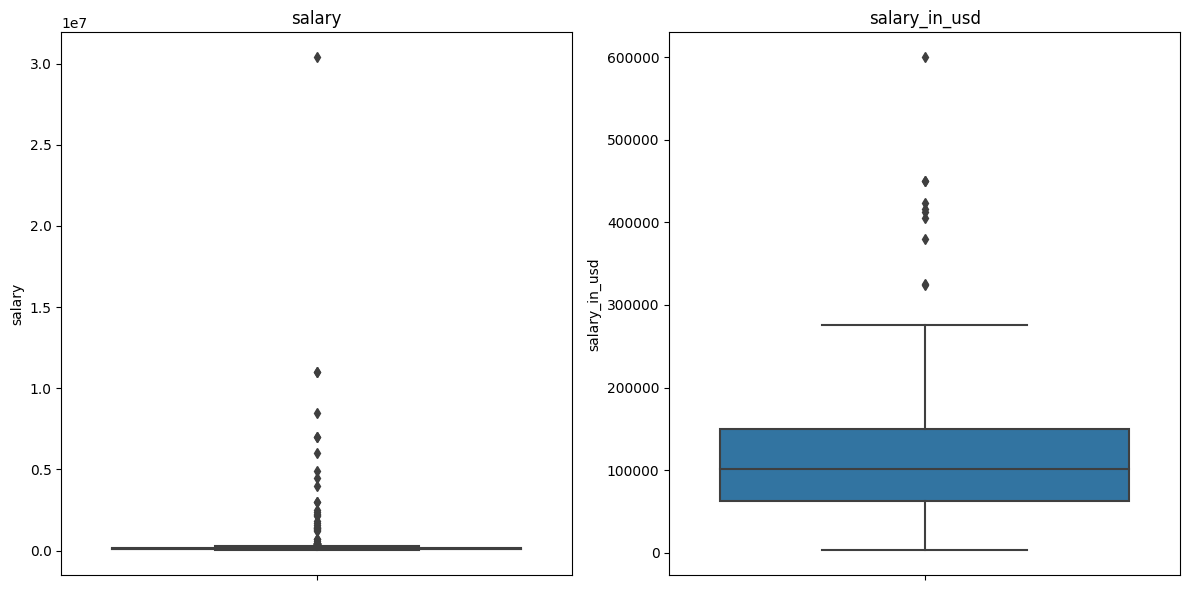

In [103]:
db_numeric = db.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
for i, col in enumerate(db_numeric.columns):
    plt.subplot(1, len(db_numeric.columns), i + 1)
    sns.boxplot(y=col, data=db_numeric)
    plt.title(col)

plt.tight_layout()
plt.show()
#podemos verificar muita variabilidade no atributo salario, como mostrado anteriormente

##Uso de tecnica boostrap


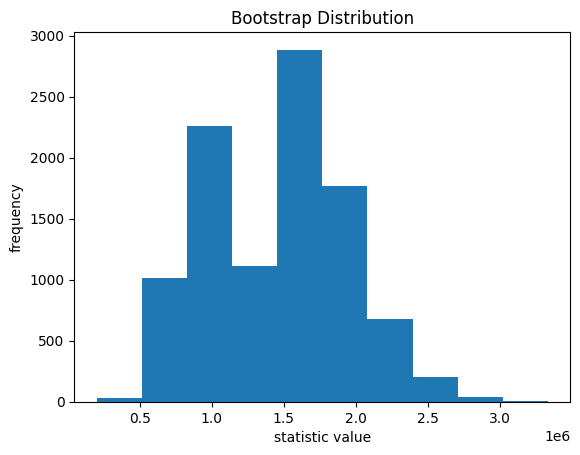

In [119]:
data = db['salary']
data = (data,)
res = bootstrap(data, np.std, confidence_level=0.9)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=10)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

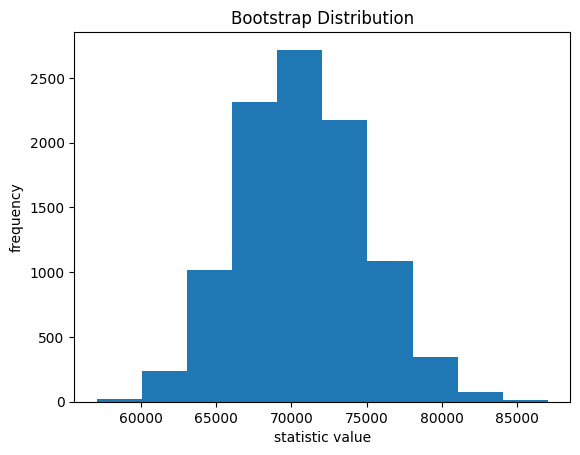

In [120]:
data2 = db['salary_in_usd']
data = (data2,)  # samples must be in a sequence
res = bootstrap(data, np.std, confidence_level=0.9)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=10)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

## Técnica de discretização

In [125]:
#Para a variavel de salario e salario_usd. Serao dividos em quartis
labels = ['1er quartil', '2do quartil', '3er quartil', '4to quartil']
db['salary_quant'] = pd.qcut(db['salary'], q = 4, labels = labels)
db['salary_usd_quant'] = pd.qcut(db['salary_in_usd'], q = 4, labels = labels)
print(db[['salary','salary_quant','salary_in_usd','salary_usd_quant']])

     salary salary_quant  salary_in_usd salary_usd_quant
0     70000  1er quartil          79833      2do quartil
1    260000  4to quartil         260000      4to quartil
2     85000  2do quartil         109024      3er quartil
3     20000  1er quartil          20000      1er quartil
4    150000  3er quartil         150000      3er quartil
..      ...          ...            ...              ...
602  154000  3er quartil         154000      4to quartil
603  126000  3er quartil         126000      3er quartil
604  129000  3er quartil         129000      3er quartil
605  150000  3er quartil         150000      3er quartil
606  200000  4to quartil         200000      4to quartil

[607 rows x 4 columns]


#Feature Engineering

In [130]:
#Gerando valores dummies para a variavel de company size, o que pode ser utilizado para um futuro modelo
db_company_size = pd.get_dummies(db['company_size'])
db = pd.concat([db, db_company_size], axis=1)
print(db)

    work_year work_month experience_level employment_type  \
0        2020          6               MI              FT   
1        2020         11               SE              FT   
2        2020         12               SE              FT   
3        2020          6               MI              FT   
4        2020         10               SE              FT   
..        ...        ...              ...             ...   
602      2022          5               SE              FT   
603      2022          6               SE              FT   
604      2022         11               SE              FT   
605      2022          2               SE              FT   
606      2022          3               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000      

In [149]:
db['data_atual'] = pd.to_datetime(db['work_year'].astype(str) + '-' + db['work_month'].astype(str) + '-01')
data_corte = pd.to_datetime('2020-01-01')
db['meses_transcorridos'] = ((db['data_atual'] - data_corte) / pd.Timedelta(days=30)).astype(int)
db

,work_year,work_month,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_quant,salary_usd_quant,L,M,S,data_atual,meses_transcorridos
0,2020,6,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1er quartil,2do quartil,1,0,0,2020-06-01,5
1,2020,11,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,4to quartil,4to quartil,0,0,1,2020-11-01,10
2,2020,12,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,2do quartil,3er quartil,0,1,0,2020-12-01,11
3,2020,6,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1er quartil,1er quartil,0,0,1,2020-06-01,5
4,2020,10,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,3er quartil,3er quartil,1,0,0,2020-10-01,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,5,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,3er quartil,4to quartil,0,1,0,2022-05-01,28
603,2022,6,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,3er quartil,3er quartil,0,1,0,2022-06-01,29
604,2022,11,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,3er quartil,3er quartil,0,1,0,2022-11-01,34
605,2022,2,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,3er quartil,3er quartil,0,1,0,2022-02-01,25
